# Aprendizaje estadístico

El aprendizaje estadístico está compuesto por un conjunto de técnicas que nos permiten **identificar patrones** en diferentes conjuntos de datos (en imágenes por ejemplo).

Se compone de dos grandes áreas:

* Aprendizaje supervisado.
* Aprendizaje no supervisado.

Las técnicas de **aprendizaje supervisado** se basan en la utilización de un conjunto de ejemplos en los que se ha identificado el patrón de interés. Estos ejemplos se utilizan para construir un modelo que identifique el patrón en nuevos casos. Una aplicación típica del aprendizaje supervisado es la detección de objetos en imágenes, por ejemplo, rostros o personas completas. 

En el **aprendizaje no supervisado** no existen ejemplo que puedan usarse como guía. Se utiliza generalmente para formar grupos de dats con caracyerísticas similares. Se utiliza para comprimir imágenes.

En las siguientes celdas exploraremos algunas aplicaciones del aprendizaje estadístico sobre imágenes.




# Reconocimiento de dígitos manuscritos

Revisaremos la aplicación del aprendizaje supervisado para la construcción de un modelo que identifique dígitos manuscritos.

In [1]:
from sklearn.datasets import load_digits
from sklearn import svm
from random import randint
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

Accedemos a algunas imágenes de dígitos manuscritos.

In [2]:
[digits,labs] = load_digits(return_X_y=True)
[N,d] = digits.shape # número de datos y dimensiones de la imagen
print(N) #número de imágenes
print(d) #tamaño

1797
64


Visualizamos algunas imágenes de dígitos manuscritos

[[ 0.  0.  4. 13. 14.  2.  0.  0.]
 [ 0.  0. 15. 10. 11. 10.  0.  0.]
 [ 0.  3. 15.  2. 12.  6.  0.  0.]
 [ 0.  0.  3.  8. 16.  7.  0.  0.]
 [ 0.  0.  0.  4.  9. 16.  2.  0.]
 [ 0.  0. 10.  3.  0. 13.  6.  0.]
 [ 0.  0. 16.  5.  7. 16.  3.  0.]
 [ 0.  0.  7. 13. 13.  8.  0.  0.]]
3


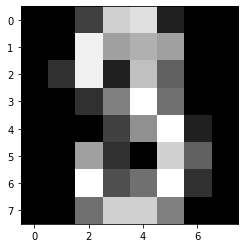

In [5]:
#elige aleatoriamente algún dato y lo visualiza
n = randint(0,N)

plt.imshow(np.reshape(digits[n],(8,8)), cmap='gray')

print(np.reshape(digits[n],(8,8)))
print(labs[n])
plt.show()

Construimos un modelo que reconozca los dígitos a partir de un conjunto de ejemplos

In [6]:
# aplana las imágenes
n_samples = len(digits)
data = digits.reshape((n_samples, -1))

# Crea un clasificador basado en una máquina de soporte vectorial
clf = svm.SVC(gamma=0.001)

# Divide el conjunto de datos en dos subconjuntos
# uno se usa para construir el modelo y el otr para probar los resultados
X_train, X_test, y_train, y_test = train_test_split(data, labs, test_size=0.5, shuffle=False)

# Construye el modelo a partir de los ejemplos
clf.fit(X_train, y_train)

# Identifica el dígito manuscrtio para cada una de las imágenes de prueba
predicted = clf.predict(X_test)

Verificamos si el dígito que asigna el modelo coincide con el real para algunos ejemplos.

8 8


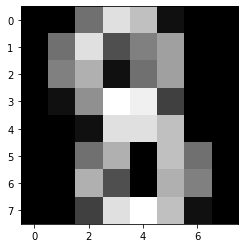

In [7]:
#elige aleatoriamente algún dato del conjunto de entrenamiento 
n_pred = len(predicted)
n = randint(0,n_pred)

plt.imshow(np.reshape(X_test[n],(8,8)), cmap='gray')
print(y_test[n], predicted[n])
plt.show()

# Detección de rostros

Para la detección de rostros, OpenCV tiene ya un modelo construido con una inmensa cantidad de imágenes.

In [8]:
import cv2

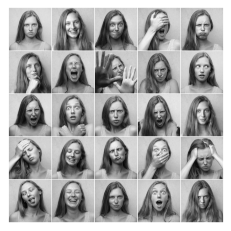

In [10]:
im = cv2.imread("faces.jpg",0)
plt.imshow(im, cmap="gray")
plt.axis("off")
plt.show()

Leemos los parámetros del modelo que se ha construido para identificar rostros 


In [11]:
face_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')

Aplicamos el modelo sobre la nueva imagen y visualizamos los resultados:

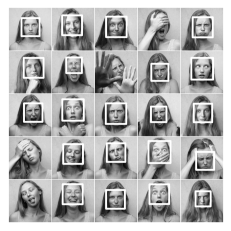

In [12]:
faces = face_cascade.detectMultiScale(im, 1.3, 4)
# dibuja rectángulos sobre los rostros detectados
for (x, y, w, h) in faces:
    cv2.rectangle(im, (x, y), (x+w, y+h), (255, 0, 0), 30)

plt.imshow(im, cmap="gray")
plt.axis("off")
plt.show()

# Detección de puntos clave en rostros

In [13]:
import dlib

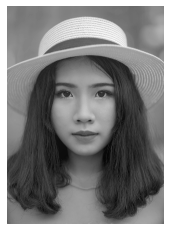

In [14]:
im = cv2.imread("face.jpg",0)
plt.imshow(im, cmap="gray")
plt.axis("off")
plt.show()

Leemos el modelo para detectar puntos clave en el rostro de una persona. La detección se hace a través de dos elementos:

1. Detector de rostros.
2. Detector de puntos clave del rostro.

<font color="red">Debemos descargar los parámetros del modelo desde el sitio:</font>


https://github.com/JeffTrain/selfie/blob/master/shape_predictor_68_face_landmarks.dat

In [15]:
detector = dlib.get_frontal_face_detector()
predictor = dlib.shape_predictor("shape_predictor_68_face_landmarks.dat")

In [17]:
rects = detector(im) #detecta el rostro
shape = predictor(im, rects[0]) # ubica los puntos clave en el rostro

In [18]:
def shape_to_np(shape, dtype="int"):
    coords = np.zeros((68, 2), dtype=dtype)
 
    for i in range(0, 68):
        coords[i] = (shape.part(i).x, shape.part(i).y)
    
    return coords

In [19]:
shape = shape_to_np(shape)
len(shape)

68

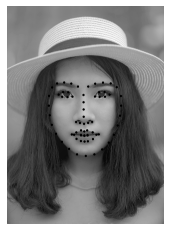

In [20]:
#mostramos los marcadores
for (x, y) in shape:
    cv2.circle(im, (x, y), 20, (0, 0, 255), -1)   

plt.imshow(im,cmap="gray")
plt.axis("off")
plt.show()

Vamos a utilizar estos puntos clave para alinear un par de rostros diferentes.

# Alineamiento de rostros

Usamos los marcadores en rostros para hacer que un rostro coincida con otro completamente diferente. 

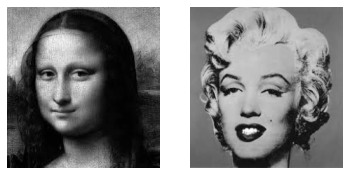

In [21]:
im1 = cv2.imread("mona.jpg",0)
im2 = cv2.imread("mary.jpg",0)

im2 = cv2.resize(im2,(im1.shape[1],im1.shape[0]))

plt.subplot(121)
plt.imshow(im1, cmap="gray")
plt.axis("off")
plt.subplot(122)
plt.imshow(im2, cmap="gray")
plt.axis("off")
plt.show()



In [22]:
def rect_to_bb(rect):
    x = rect.left()
    y = rect.top()    
    w = rect.right() - x
    h = rect.bottom() - y
    
    return (x, y, w, h)

def shape_to_np(shape, dtype="int"):
    coords = np.zeros((68, 2), dtype=dtype)
 
    for i in range(0, 68):
        coords[i] = (shape.part(i).x, shape.part(i).y)
    
    return coords

def rect2homog(pts):
    n = pts.shape[0]
    o = np.ones(n)
    return np.column_stack((pts,o))

def aplicaHomografia(pts, H):
    pts_h = rect2homog(pts)
    pts_t = np.dot(H,np.transpose(pts_h))
    pts_t_trans = np.transpose(pts_t)
    return normalizaPuntos(pts_t_trans)

def normalizaPuntos(pts_h):
    return np.column_stack((np.divide(pts_h[:,0],pts_h[:,2]),np.divide(pts_h[:,1],pts_h[:,2])))

#envía los índices del triángulo, 
#los puntos del triángulo en I1, 
#la imagen a transformar
def triangulo_transf(t, shape1, shape2, im):
    
    pt0_1 = (shape1[t[0]][0],shape1[t[0]][1])
    pt1_1 = (shape1[t[1]][0],shape1[t[1]][1])
    pt2_1 = (shape1[t[2]][0],shape1[t[2]][1])
    pts1 = np.array([pt0_1, pt1_1, pt2_1])
    
    pt0_2 = (shape2[t[0]][0],shape2[t[0]][1])
    pt1_2 = (shape2[t[1]][0],shape2[t[1]][1])
    pt2_2 = (shape2[t[2]][0],shape2[t[2]][1])
    pts2 = np.array([pt0_2, pt1_2, pt2_2])
    
    pts1 = np.float32(pts1)
    pts2 = np.float32(pts2)
    
    #determina la transformación afín
    taf = cv2.getAffineTransform(pts2,pts1)        
    
    #determina la homografía
    H = np.append(taf,[[0,0,1]], axis=0)
       
    #transforma los puntos
    pts_t = aplicaHomografia(pts2,H)
    
    (m,n) = im.shape
    
    alpha = np.zeros((m,n))
    
    points = [[int(pts_t[0][1]-0.5),int(pts_t[1][1]-0.5), int(pts_t[2][1]-0.5)],[int(pts_t[0][0]-0.5), int(pts_t[1][0]-0.5), int(pts_t[2][0]-0.5)], [1,1,1]]
    
    for i in range(min(points[0]),max(points[0])):
        for j in range(min(points[1]),max(points[1])):            
            x = np.linalg.solve(points,[i,j,1])
            if min(x) > 0: #all coefficients positive
                alpha[i,j] = 1
    im_t = cv2.warpAffine(im,taf,(n,m))
    alpha[alpha>0] = im_t[alpha>0]
    return alpha

In [23]:
rects1 = detector(im1) 
shape1 = predictor(im1, rects1[0])
shape1 = shape_to_np(shape1)

rects2 = detector(im2) 
shape2 = predictor(im2, rects2[0])
shape2 = shape_to_np(shape2)
len(shape2)

68

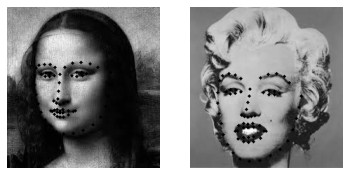

In [24]:
#mostramos los marcadores
im_copy1 = im1.copy()
im_copy2 = im2.copy()

for (x, y) in shape1:
    cv2.circle(im_copy1, (x, y), 2, (0, 0, 255), -1)
    
for (x, y) in shape2:
    cv2.circle(im_copy2, (x, y), 2, (0, 0, 255), -1)
    

plt.subplot(121)
plt.imshow(im_copy1,cmap="gray")
plt.axis("off")

plt.subplot(122)
plt.imshow(im_copy2,cmap="gray")
plt.axis("off")

plt.show()

In [25]:
#agregamos puntos adicionales ubicados en el marco de ambas imágenes
shape1 = np.append(shape1,[[im1.shape[1]-1,im1.shape[0]/2],[im1.shape[1]/2,im1.shape[0]-1],[im1.shape[1]/2,0],[0,im1.shape[0]/2],[0,0],[im1.shape[1]-1,0],[0,im1.shape[0]-1],[im1.shape[1]-1,im1.shape[0]-1]], axis=0)
shape2 = np.append(shape2,[[im2.shape[1]-1,im2.shape[0]/2],[im2.shape[1]/2,im2.shape[0]-1],[im2.shape[1]/2,0],[0,im2.shape[0]/2],[0,0],[im2.shape[1]-1,0],[0,im2.shape[0]-1],[im2.shape[1]-1,im2.shape[0]-1]], axis=0)

In [26]:
from scipy.spatial import Delaunay

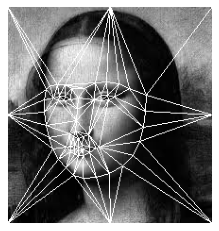

In [27]:
tri = Delaunay(shape1)

cp_1 = im1.copy()

for t in tri.simplices:    
    pt0 = (int(shape1[t[0]][0]),int(shape1[t[0]][1]))
    pt1 = (int(shape1[t[1]][0]),int(shape1[t[1]][1]))
    pt2 = (int(shape1[t[2]][0]),int(shape1[t[2]][1]))
    
    cv2.line(cp_1,pt0,pt1,(255,255,255),1) 
    cv2.line(cp_1,pt0,pt2,(255,255,255),1)
    cv2.line(cp_1,pt1,pt2,(255,255,255),1)
    
plt.imshow(cp_1,cmap="gray")
plt.axis("off")
plt.show()     

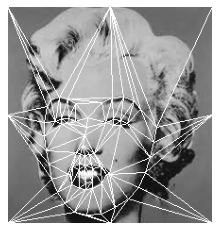

In [28]:
cp_2 = im2.copy()

for t in tri.simplices:    
    pt0 = (int(shape2[t[0]][0]),int(shape2[t[0]][1]))
    pt1 = (int(shape2[t[1]][0]),int(shape2[t[1]][1]))
    pt2 = (int(shape2[t[2]][0]),int(shape2[t[2]][1]))
    
    cv2.line(cp_2,pt0,pt1,(255,255,255),1)
    cv2.line(cp_2,pt0,pt2,(255,255,255),1)
    cv2.line(cp_2,pt1,pt2,(255,255,255),1)
    
plt.imshow(cp_2,cmap="gray")
plt.axis("off")
plt.show()      

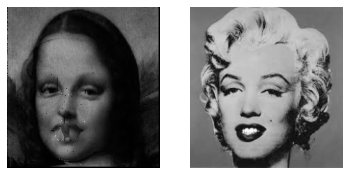

In [33]:
im_fin = np.zeros((im1.shape))
for t in tri.simplices:    
    #transforma la imagen alineando el triángulo y lo extrae
    triang_tr = triangulo_transf(t, shape2, shape1, im1)
    im_fin = im_fin + triang_tr

#muestra la imagen
plt.gray()
plt.subplot(121)
plt.axis("off")
plt.imshow(im_fin)

plt.subplot(122)
plt.imshow(im2,cmap="gray")
plt.axis("off")
plt.show()

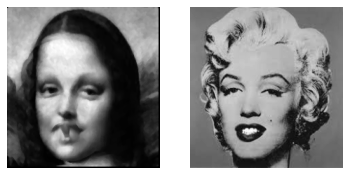

In [35]:
im_fin = im_fin.astype(np.uint8)
im_fin = cv2.medianBlur(im_fin,3)

#muestra la imagen
plt.gray()
plt.subplot(121)
plt.axis("off")
plt.imshow(im_fin)

plt.subplot(122)
plt.imshow(im2,cmap="gray")
plt.axis("off")
plt.show()

Este proceso se puede utilizar como base para un efecto especial llamado **morphing**. Puedes ver un ejemplo en el video del siguiente enlace

https://www.youtube.com/watch?v=F2AitTPI5U0

El efecto inicia en el minuto 5:30

# Otras aplicaciones

El aprendizaje estadístico se utiliza además en:

1. **Medicina**. Para diagnosticar diferentes enfermedades y para sugerir tratamientos personalizados.
2. **Marketing**. Para sugerir productos personalizados a los clientes aumentando la probabilidad de compra.
3. **Logística**. Para predecir la demanda de los productos y los servicios que ofrece alguna organización.
4. **Mantenimiento industrial**. Para identificar el momento adecuado para dar mantenimiento a la maquinaria.

¡Y muchas áreas más!.

Si estas áreas te motivan, entonces podría interesarte estudiar el programa de **Ingeniería en Datos e Inteligencia Organizacional** que ofrece la **Universidad del Caribe**. 

La convocatoria para el ingreso de la generación 2021 está abierta y pudes consultarla en la siguiente página:

https://www.unicaribe.mx/

